In [1]:
import itertools
import copy
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from operator import itemgetter

/Applications/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Applications/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Applications/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Applications/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size

In [3]:
data = open("newdata.txt").readlines()

for i in range(len(data)):
    data[i] = [x.strip() for x in data[i].split('\t')]
    data[i] = list(filter(None, data[i]))

def jaccard_distance(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    
    #Taking jaccard distance as 1- (jaccard  coefficient of two sets of topics)
    return 1-len(s1.intersection(s2)) / len(s1.union(s2)) 

n = len(data)
distance_matrix = [[0 for x in range(0,n)] for y in range(0,n)]
for i in range(0,n):
    for j in range(0,n):
        distance_matrix[i][j] = jaccard_distance(data[i], data[j])

## Creating Graph using Networkx

In [4]:
G = nx.Graph()
for i in range(0,n):
    for j in range(0,n):
        if j < i:
            
            ## Setting the threshold as 1
            if distance_matrix[i][j] < 1:
                G.add_edge(i,j, length = distance_matrix[i][j])

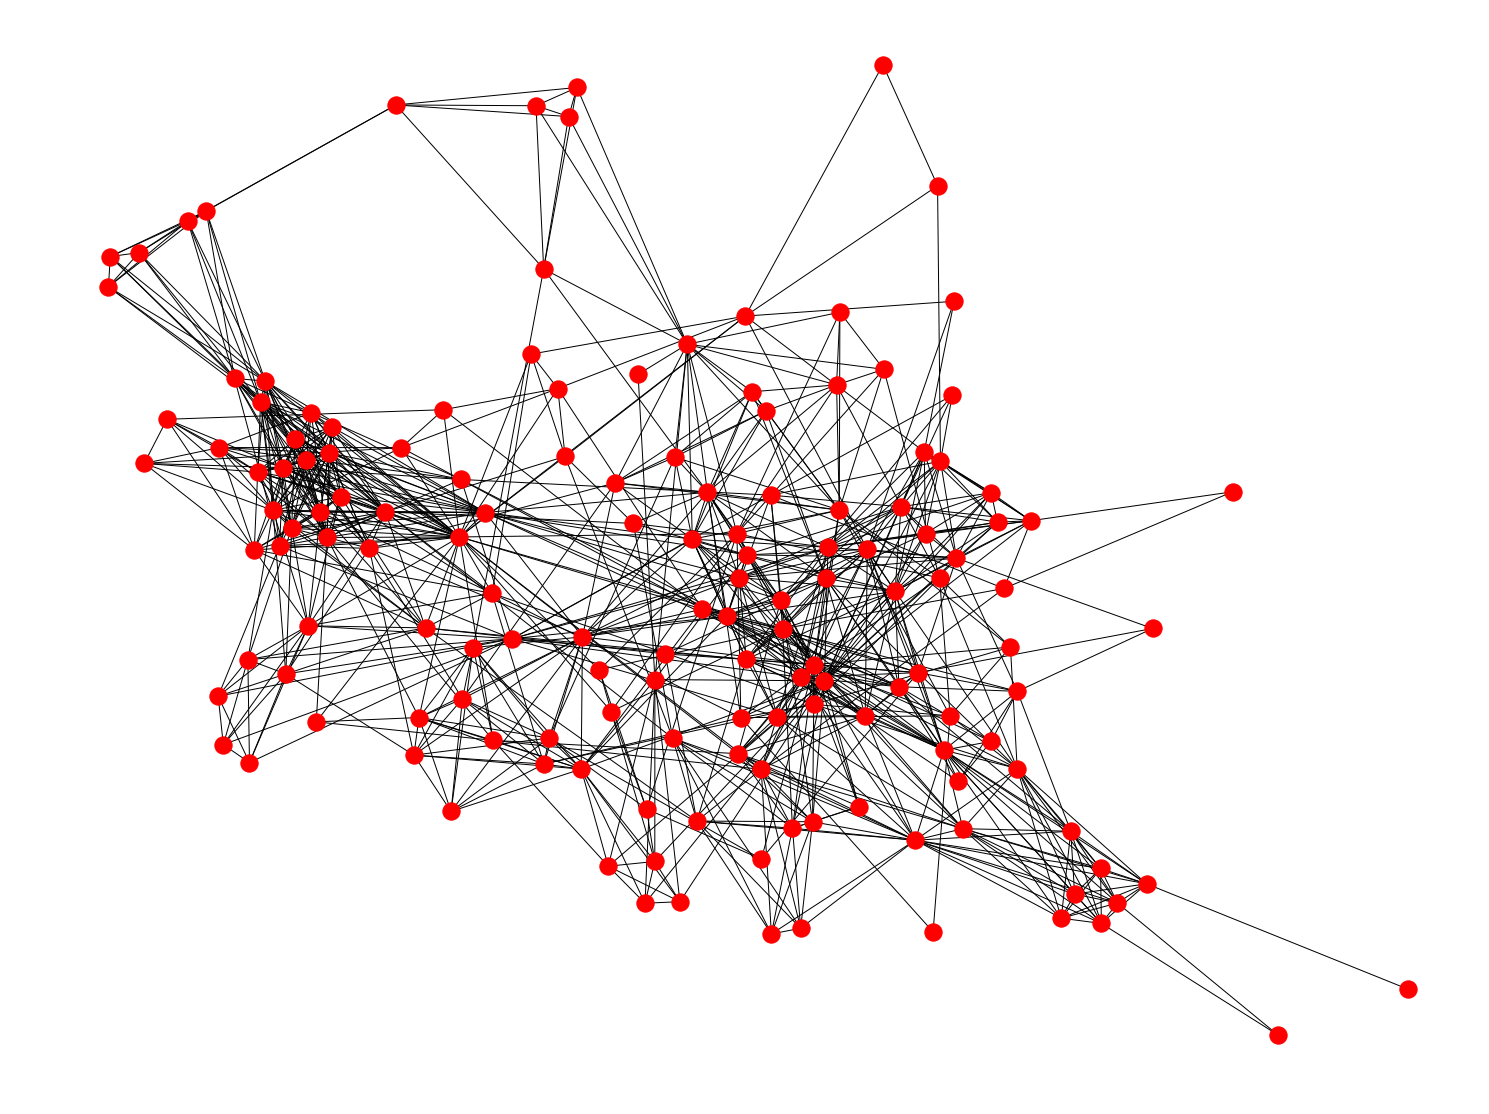

In [5]:
nx.draw(G)

## Girvan-Newman clustering algorithm

In [6]:
def edge_to_be_removed(G):
    
    edge_dict = nx.edge_betweenness_centrality(G)
    edge_tuples = edge_dict.items()
    edge_tuples = sorted(edge_tuples,key=itemgetter(1), reverse=True)
    return edge_tuples[0][0]

def girvan_newman_algorithm(G, number_of_clusters = 1):
    
    clusters = list(nx.connected_component_subgraphs(G))
    clusters_count = len(clusters)
    
    while clusters_count < number_of_clusters:
        G.remove_edge(*edge_to_be_removed(G))
        clusters = list(nx.connected_component_subgraphs(G))
        clusters_count = len(clusters)
    
    return clusters

In [7]:
c = girvan_newman_algorithm(G, number_of_clusters = 9)

In [8]:
count = 0
clusters_girvan = [-1 for x in range(0,150)]
for i in c:  
    for j in range(0, len(i)):
        clusters_girvan[list(i.nodes())[j]] = count
    count = count + 1

In [9]:
count = 0
for i in c:
    count = count + 1
    print("-------------------- CLUSTER -", count,"--------------------")
    print(i.nodes(), "\n\nNumber of data points in the cluster = ",len(i))
    print("-----------------------------------------------------\n\n")

-------------------- CLUSTER - 1 --------------------
[0, 2, 132, 4, 133, 135, 136, 8, 137, 138, 140, 17, 18, 19, 20, 146, 24, 27, 29, 31, 34, 37, 39, 49, 50, 52, 55, 67, 68, 70, 76, 79, 86, 87, 95, 96, 106, 116, 117, 121, 123, 124, 126] 

Number of data points in the cluster =  43
-----------------------------------------------------


-------------------- CLUSTER - 2 --------------------
[128, 1, 130, 5, 9, 11, 12, 141, 14, 143, 16, 144, 145, 147, 148, 21, 149, 22, 25, 32, 33, 36, 40, 41, 42, 43, 44, 45, 46, 51, 54, 56, 57, 60, 61, 63, 64, 65, 69, 72, 75, 77, 80, 84, 89, 90, 91, 93, 94, 98, 99, 100, 102, 103, 104, 109, 110, 111, 114, 115, 119, 125] 

Number of data points in the cluster =  62
-----------------------------------------------------


-------------------- CLUSTER - 3 --------------------
[129, 3, 134, 71, 13, 48, 113, 30, 127] 

Number of data points in the cluster =  9
-----------------------------------------------------


-------------------- CLUSTER - 4 -------------

In [10]:
np.array(clusters_girvan)

array([0, 1, 0, 2, 0, 1, 6, 3, 0, 1, 6, 1, 1, 2, 1, 3, 1, 0, 0, 0, 0, 1,
       1, 4, 0, 1, 4, 0, 5, 0, 2, 0, 1, 1, 0, 3, 1, 0, 3, 0, 1, 1, 1, 1,
       1, 1, 1, 7, 2, 0, 0, 1, 0, 7, 1, 0, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1,
       7, 0, 0, 1, 0, 2, 1, 7, 5, 1, 0, 1, 8, 0, 1, 5, 3, 7, 1, 4, 0, 0,
       7, 1, 1, 1, 3, 1, 1, 0, 0, 6, 1, 1, 1, 6, 1, 1, 1, 3, 0, 3, 3, 1,
       1, 1, 5, 2, 1, 1, 0, 0, 4, 1, 3, 0, 3, 0, 0, 1, 0, 2, 1, 2, 1, 5,
       0, 0, 2, 0, 0, 0, 0, 3, 0, 1, 3, 1, 1, 1, 0, 1, 1, 1])

In [11]:
count = 0
for i in c:
    count = count + 1
    print("-------------------- CLUSTER -", count,"--------------------")
    print("Number of data points in the cluster = ",len(i))
    print("-----------------------------------------------------\n")

-------------------- CLUSTER - 1 --------------------
Number of data points in the cluster =  43
-----------------------------------------------------

-------------------- CLUSTER - 2 --------------------
Number of data points in the cluster =  62
-----------------------------------------------------

-------------------- CLUSTER - 3 --------------------
Number of data points in the cluster =  9
-----------------------------------------------------

-------------------- CLUSTER - 4 --------------------
Number of data points in the cluster =  16
-----------------------------------------------------

-------------------- CLUSTER - 5 --------------------
Number of data points in the cluster =  4
-----------------------------------------------------

-------------------- CLUSTER - 6 --------------------
Number of data points in the cluster =  5
-----------------------------------------------------

-------------------- CLUSTER - 7 --------------------
Number of data points in the cluster 